# Week 3 Practical: Unsupervised Learning

**Aims:**
- To complement lecture material in understanding unsupervised learning.
- To produce some assessable work for this subject.

In lectures, we have discussed density estimation, k-means clustering and Gaussian mixture models. Note that Matlab includes implementations of these in the “Statistics and Machine Learning Toolbox”. Search the Matlab help for some nicely documented examples. Reading through these examples is highly recommended, whether you use python or Matlab. In Python, scikit-learn also has implementations of k-means and GMM.

---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1
from sklearn.cluster import KMeans

# Question 2
from numpy.linalg import eig

# Question 3
from sklearn.datasets import fetch_openml

---

**Question 1:** 

Apply the k-means clustering algorithm (as implemented in Matlab or python scikitlearn) to the heightweight dataset (second and third columns). Plot the resulting cluster centres together with the data. Colour the data according to class label (first column; hint: sort the data!).

In [2]:
# Load dataset
height_weight_data = pd.read_csv('Datasets/heightWeightData.csv', 
                                 names=['Class', 'Height', 'Weight'])

height_weight_data = height_weight_data.sort_values(by='Class')
X = height_weight_data[['Height', 'Weight']].values
true_labels = height_weight_data['Class'].values
n_clusters = len(np.unique(true_labels))

height_weight_data


,Class,Height,Weight
0,1,67,125
118,1,74,172
117,1,73,247
116,1,69,170
111,1,69,155
...,...,...,...
27,2,66,113
120,2,62,140
121,2,64,120
114,2,65,115


In [3]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=4702)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

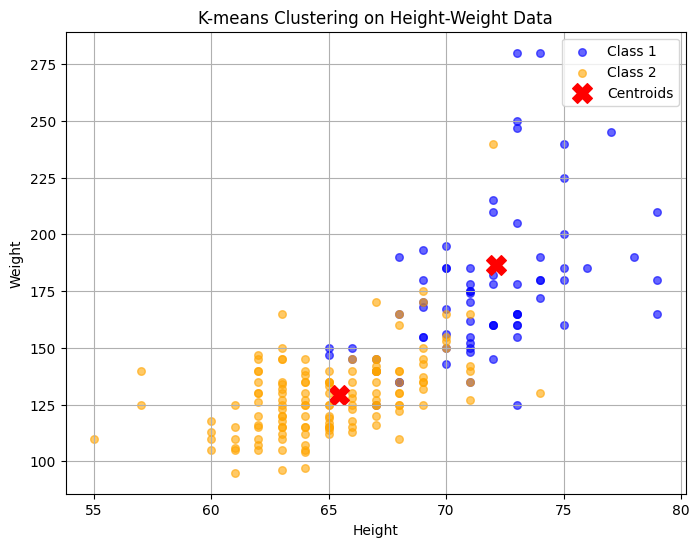

In [4]:
plt.figure(figsize=(8, 6))
colours = {1: 'blue', 2: 'orange'}

for label in np.unique(true_labels):
    mask = (true_labels == label)
    plt.scatter(X[mask, 0], X[mask, 1], color=colours[label], s=30, alpha=0.6, label=f'Class {label}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('K-means Clustering on Height-Weight Data')
plt.legend()
plt.grid(True)
plt.show()


---

Principal Component Analysis (PCA) can be implemented very simply in Matlab or python. Given a dataset (as a matrix X), the covariance matrix can be found using the Matlab covariance function (cov(X)). Then, the eigenvectors and eigenvalues of this covariance matrix are the principal component (vectors) and principal values respectively. The eigenvalues reflect the amount of variance accounted for by each principal component and are ordered. To perform dimensionality reduction (e.g. down to 2 dimensions), we need to multiply X by the two eigenvectors with the largest corresponding eigenvalues.

---

**Question 2:** Write a Matlab or python function implementing PCA.

In [5]:
def PCA(X, n_components):
    """
    Perform Principal Component Analysis (PCA) on the dataset X.

    Parameters:
    X : numpy array of shape (n_samples, n_features)
        Input data.
    n_components : int
        Number of principal components to return.

    Returns:
    X_pca : numpy array of shape (n_samples, n_components)
        Data projected onto the principal components.
    eigenvalues : numpy array
        Sorted eigenvalues in descending order.
    eigenvectors : numpy array
        Eigenvectors sorted corresponding to the eigenvalues.
    """
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Select the top n_components eigenvectors
    eigenvectors_reduced = eigenvectors[:, :n_components]
    
    # Project the data onto the selected eigenvectors
    X_pca = np.dot(X_centered, eigenvectors_reduced)
    
    return X_pca, eigenvalues, eigenvectors

---

**Question 3:** Run your PCA function on the MNIST data.

In [6]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X_mnist = mnist.data.astype(np.float64)
y_mnist = mnist.target.astype(int)

# Use a subset for faster computation (e.g., 2000 samples)
subset = 2000
X_subset = X_mnist[:subset]
y_subset = y_mnist[:subset]

# Run PCA on the MNIST subset
# We compute PCA with all components to later analyze variance explained,
# but for plotting, we only need the first two components.
X_pca_mnist, eigenvalues_mnist, eigenvectors_mnist = PCA(X_subset, n_components=X_subset.shape[1])

# Obtain the projection onto the first two principal components
X_pca_mnist_2d = X_pca_mnist[:, :2]

print("PCA on MNIST completed.")
print("Shape of PCA-transformed data (all components):", X_pca_mnist.shape)
print("Shape of first two components:", X_pca_mnist_2d.shape)

PCA on MNIST completed.
Shape of PCA-transformed data (all components): (2000, 784)
Shape of first two components: (2000, 2)


---

**Question 4:** Produce a plot of the data in the space spanned by the first two principal components. Colour each point by its class.


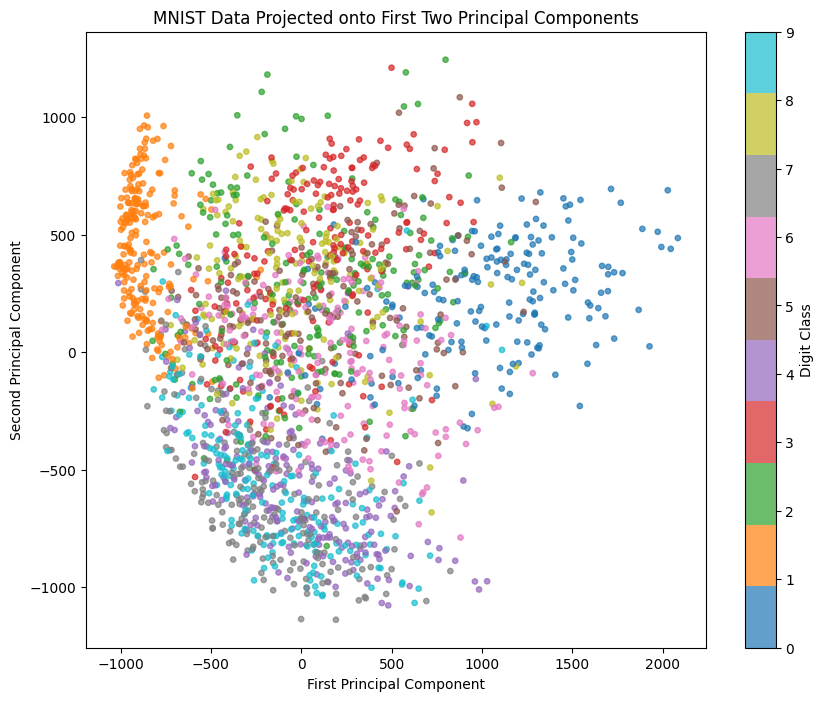

In [7]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_mnist_2d[:, 0], X_pca_mnist_2d[:, 1], c=y_subset, cmap='tab10', s=15, alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Data Projected onto First Two Principal Components')
plt.colorbar(scatter, ticks=range(10), label='Digit Class')
plt.show()

---

**Question 5:** What percentage of the data variance is accounted for by the first two principal components?

In [8]:
variance_first_two = eigenvalues_mnist[0] + eigenvalues_mnist[1]
total_variance = np.sum(eigenvalues_mnist)
variance_percentage = 100 * variance_first_two / total_variance

total_variance

# print(f"Percentage of variance explained by the first two principal components: {variance_percentage:.2f}%")

3388454.5162008507

---

**Question 6:** From the results, produce a Scree graph.

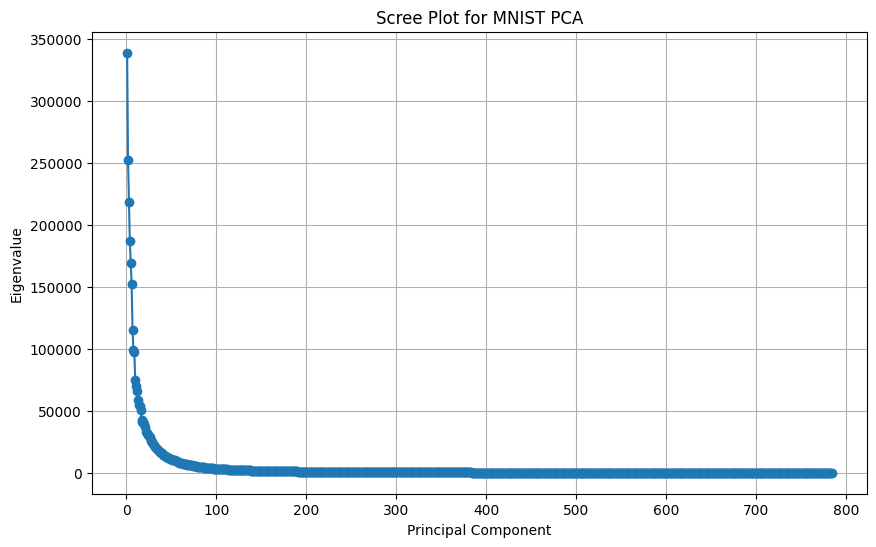

In [9]:
plt.figure(figsize=(10, 6))
components = np.arange(1, len(eigenvalues_mnist) + 1)
plt.plot(components, eigenvalues_mnist, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for MNIST PCA')
plt.grid(True)
plt.show()

---

**Question 7:** Repeat the procedure in (Q3-6) using the Swiss roll dataset. Comment briefly on the results (a few sentences).

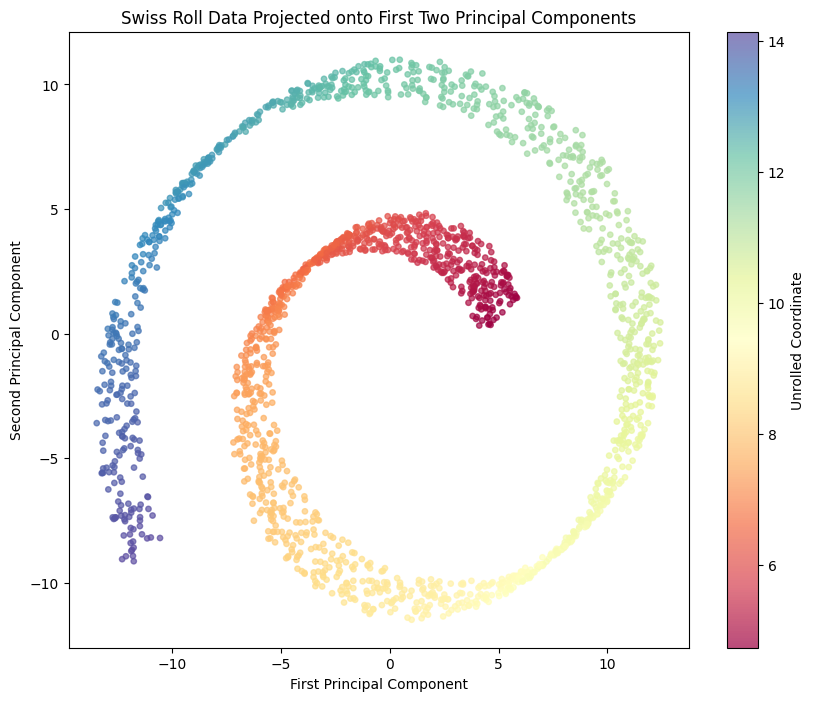

Swiss roll - Variance explained by the first two components: 71.57%


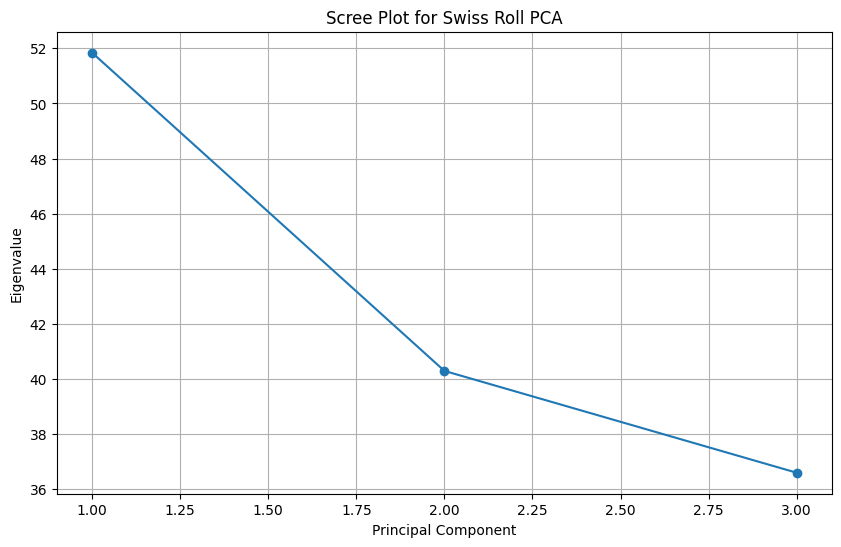

In [ ]:
# Q7: Apply PCA on the Swiss roll dataset and analyze the results
# Steps:
# 1. Generate the Swiss roll dataset using sklearn's make_swiss_roll.
# 2. Run PCA on the Swiss roll data.
# 3. Plot the first two principal components.
# 4. Compute the variance explained by the first two components.
# 5. Produce a Scree graph.
# 6. Comment on the effectiveness of PCA for this nonlinear dataset.

from sklearn.datasets import make_swiss_roll

# Generate the Swiss roll dataset
X_swiss, t = make_swiss_roll(n_samples=2000, noise=0.05, random_state=42)

# Run PCA on the Swiss roll data
X_pca_swiss, eigenvalues_swiss, eigenvectors_swiss = PCA(X_swiss, n_components=X_swiss.shape[1])

# Projection onto the first two principal components
X_pca_swiss_2d = X_pca_swiss[:, :2]

# Plot the Swiss roll data in the space of the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_swiss_2d[:, 0], X_pca_swiss_2d[:, 1], c=t, cmap='Spectral', s=15, alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Swiss Roll Data Projected onto First Two Principal Components')
plt.colorbar(scatter, label='Unrolled Coordinate')
plt.show()

# Compute the variance explained by the first two components
variance_first_two_swiss = eigenvalues_swiss[0] + eigenvalues_swiss[1]
total_variance_swiss = np.sum(eigenvalues_swiss)
variance_percentage_swiss = 100 * variance_first_two_swiss / total_variance_swiss

print(f"Swiss roll - Variance explained by the first two components: {variance_percentage_swiss:.2f}%")

# Produce a Scree graph for the Swiss roll data
plt.figure(figsize=(10, 6))
components_swiss = np.arange(1, len(eigenvalues_swiss) + 1)
plt.plot(components_swiss, eigenvalues_swiss, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Swiss Roll PCA')
plt.grid(True)
plt.show()

# Commentary:
# The Swiss roll dataset is inherently nonlinear (curved in three dimensions). 
# PCA, being a linear technique, does not capture the intrinsic nonlinear structure.
# As a result, the first two principal components account for a relatively low percentage
# of the total variance, and the 2D projection does not effectively "unroll" the data.
# This highlights the limitation of PCA for nonlinear manifolds.


---

**Bonus Question:** PCA is used for dimensionality reduction. One use of this is as a pre-processing step (feature extraction) before training a supervised learning model on a subset of the principal components rather than the original dataset features. Try this out on one of the datasets you have used in the course and compare the performance of the supervised learning model with and without using PCA.

---